In [15]:
%run /eos/project/l/liu/Toolbox/myToolbox.py

%config InlineBackend.figure_format = 'retina'

from scipy.constants import m_p, c, e, codata

/eos/project/l/liu/Toolbox/myToolbox.py:24: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-957.10.1.el7.x86_64-x86_64-with-centos-7.6.1810-Core
Your folder is /eos/user/a/ahuschau/Simulations/PS/optics_repository/iOMC/psmod/2018/output/track/tracking_test
Your IP is 172.17.0.9
2019-03-29 16:48:56


In [16]:
def plot_analytical_separatrix(V_rf, harmonic, Etot, beta): 
    # based on S.Y. Lee - Accelerator Physics
    phi = np.linspace(-np.pi, np.pi, num=500)
    s = np.linspace(0, 2*np.pi*100, num=500)    
    dpp = np.sqrt((1+np.cos(harmonic*phi))*V_rf/(Etot*1e9)/beta**2/np.pi/harmonic/np.abs(eta))
    plt.plot(s-np.pi*100, dpp, 'o', markeredgecolor = 'none', mew=1, color='firebrick')
    plt.plot(s-np.pi*100, -dpp, 'o', markeredgecolor = 'none', mew=1, color='firebrick')

In [4]:
files_ = sorted(glob.glob('ptc_track*'))

alllabels 11
alllabels 11
alllabels 11
alllabels 11
alllabels 11
alllabels 11
alllabels 11
alllabels 11
alllabels 11


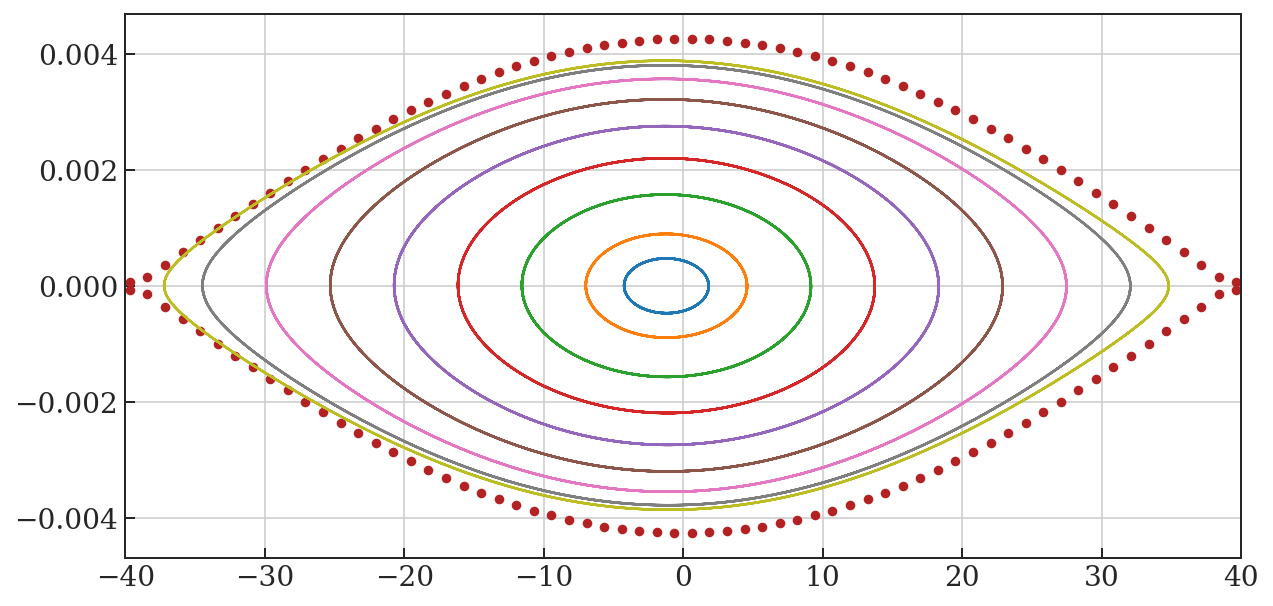

In [23]:
f, ax = plt.subplots(1, figsize = (10, 5))

V_rf = 60e3 # in [V]
harmonic = 8
E0 = codata.value('proton mass energy equivalent in MeV')/1e3
Etot=1.4+E0
alpha_c_array = [0.02669]
eta = alpha_c_array[0] - gamma**-2

# relativistic functions
gamma = Etot/E0
beta = np.sqrt(1 - gamma**-2)

plot_analytical_separatrix(V_rf, harmonic, Etot, beta)

for f in files_:
    a = metaclass.twiss(f)
    plt.plot(a.T*beta, a.PT)
    
plt.xlim(-40, 40)

plt.grid()